In [6]:
# 📊 Поведенческая сегментация клиентов

# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [7]:
# 🔹 Загрузка сегментированных данных
df = pd.read_parquet('../data/processed/features_with_clusters.parquet')
df.head()


,card_id,total_txn_count,avg_amount,std_amount,total_amount,unique_mcc,unique_city,avg_days_between,pct_wallet,pct_contactless,pct_cash,pct_foreign,cluster,cluster_name
0,10000,7955,21412.395036,59340.365046,170335602.51,36,6,0.000000,0.517662,0.206537,0.099811,0.000629,1,Экономные потребители
1,10001,850,33839.0194,86478.516953,28763166.49,34,6,0.004711,0.585882,0.211765,0.195294,0.000000,2,Бюджетные традиционалисты
2,10002,1731,11344.696713,25329.521268,19637670.01,36,6,0.009249,0.853264,0.023108,0.043905,0.001733,2,Бюджетные традиционалисты
3,10003,4852,4423.856974,9620.604875,21464554.04,36,6,0.001031,0.462284,0.103462,0.050082,0.000000,2,Бюджетные традиционалисты
4,10004,353,27729.817025,49188.58248,9788625.41,22,6,1.113636,0.379603,0.254958,0.283286,0.000000,0,Цифровые активисты


In [8]:
# 🔹 Распределение по кластерам
cluster_counts = df['cluster_name'].value_counts().reset_index()
cluster_counts.columns = ['cluster_name', 'count']
cluster_counts['percent'] = cluster_counts['count'] / cluster_counts['count'].sum() * 100
cluster_counts


,cluster_name,count,percent
0,Бюджетные традиционалисты,965,48.25
1,Экономные потребители,484,24.20
2,Премиум-покупатели,242,12.10
3,Цифровые активисты,172,8.60
4,Умеренные и стабильные,137,6.85


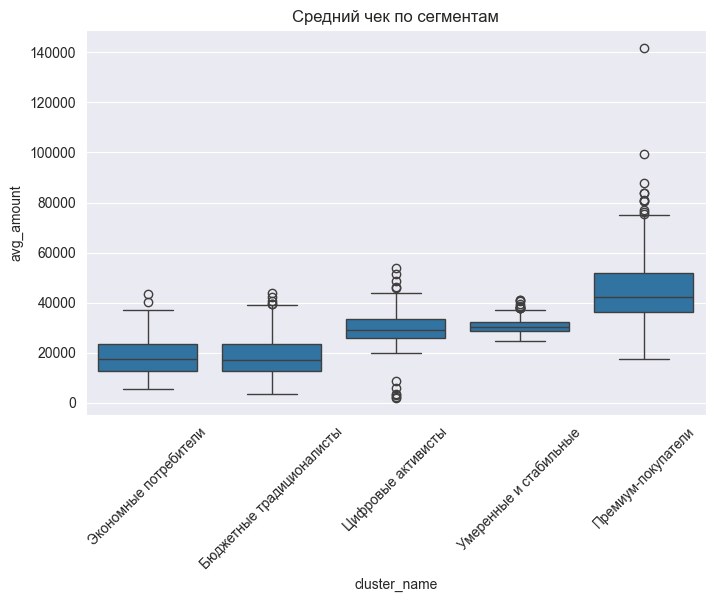

In [9]:
# 🔹 Boxplot среднего чека по сегментам
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='cluster_name', y='avg_amount')
plt.xticks(rotation=45)
plt.title('Средний чек по сегментам')
plt.show()


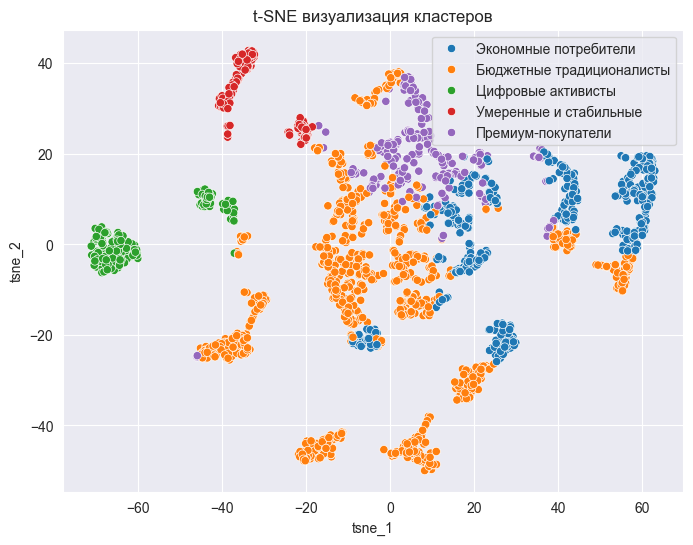

In [10]:
# 🔹 Визуализация t-SNE
X = df.drop(columns=['card_id', 'cluster', 'cluster_name'])
X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

df['tsne_1'] = tsne_result[:, 0]
df['tsne_2'] = tsne_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tsne_1', y='tsne_2', hue='cluster_name', palette='tab10')
plt.title('t-SNE визуализация кластеров')
plt.legend(loc='best')
plt.show()


In [11]:
# ✅ Выводы
print("""
- Кластеры различаются по среднему чеку
- t-SNE показывает хорошую разделимость
- Названия сегментов отражают поведенческие паттерны
""")



- Кластеры различаются по среднему чеку
- t-SNE показывает хорошую разделимость
- Названия сегментов отражают поведенческие паттерны

